In [409]:
import pandas as pd
import numpy as np

## AUTH

In [410]:
# select * from (
# SELECT registration_date
# , user_phone
# , status
# , role
# , report_type
# , row_number() over(partition by user_phone,report_type order by registration_date desc) rn
# FROM "MART_AUTH"."REGISTRATIONS" t 
# where 1=1 
# and status = 'ACTIVE'
# ) t 
# where rn  = 1

In [411]:
au = pd.read_csv('_REGISTRATIONS__202411272154.csv', sep=";" )
#au= au.query('report_type != "Новый пользователь"')
au 

C:\Users\flerinvs\AppData\Local\Temp\ipykernel_39512\4148781204.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  au = pd.read_csv('_REGISTRATIONS__202411272154.csv', sep=";" )


,registration_date,user_phone,status,role,report_type,rn
0,2020-03-04,70000000000,ACTIVE,UNKNOWN,Новый пользователь,1
1,2021-04-01,70000000001,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...,1
2,2020-08-11,70000000001,ACTIVE,CLIENT,Новый пользователь,1
3,2021-04-01,70000000002,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...,1
4,2021-04-01,70000000002,ACTIVE,CLIENT,Новый пользователь,1
...,...,...,...,...,...,...
3585383,2021-05-18,89827677522,ACTIVE,UNKNOWN,Новый пользователь,1
3585384,2021-05-31,89852326755,BLOCKED,REALTOR,Зарегистрированный пользователь (установлен па...,1
3585385,2021-05-31,89852326755,BLOCKED,REALTOR,Новый пользователь,1
3585386,2024-11-26,NaN,ACTIVE,REALTOR,Зарегистрированный пользователь (установлен па...,1


In [412]:
#чистим данные 
au = au[au['user_phone'].notna()]
au['user_phone'] = au['user_phone'].apply(lambda x: str(x).replace('.0', ''))
au

C:\Users\flerinvs\AppData\Local\Temp\ipykernel_39512\1962917479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  au['user_phone'] = au['user_phone'].apply(lambda x: str(x).replace('.0', ''))


,registration_date,user_phone,status,role,report_type,rn
0,2020-03-04,70000000000,ACTIVE,UNKNOWN,Новый пользователь,1
1,2021-04-01,70000000001,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...,1
2,2020-08-11,70000000001,ACTIVE,CLIENT,Новый пользователь,1
3,2021-04-01,70000000002,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...,1
4,2021-04-01,70000000002,ACTIVE,CLIENT,Новый пользователь,1
...,...,...,...,...,...,...
3585381,2021-05-17,89659902382,DELETED,REALTOR,Новый пользователь,1
3585382,2021-05-17,89673793721,ACTIVE,UNKNOWN,Новый пользователь,1
3585383,2021-05-18,89827677522,ACTIVE,UNKNOWN,Новый пользователь,1
3585384,2021-05-31,89852326755,BLOCKED,REALTOR,Зарегистрированный пользователь (установлен па...,1


In [413]:
au['report_type'].value_counts()

report_type
Новый пользователь                                     2460587
Зарегистрированный пользователь (установлен пароль)    1124799
Name: count, dtype: int64

In [414]:
# Находим все user_phone, e кот. есть 'Зарегистрированный пользователь (установлен пароль)'
registered_users = au[au['report_type'] == 'Зарегистрированный пользователь (установлен пароль)']['user_phone'].unique()
# Удаляем строки с 'Новый пользователь', если есть 'Зарегистрированный пользователь (установлен пароль)'
au = au[~((au['report_type'] == 'Новый пользователь') & (au['user_phone'].isin(registered_users)))]
display(au['report_type'].value_counts())
display(au['user_phone'].duplicated().sum())

report_type
Новый пользователь                                     1335788
Зарегистрированный пользователь (установлен пароль)    1124799
Name: count, dtype: int64

0

In [415]:
#  select * from (
#  SELECT registration_date
#  , user_phone
#  , status
#  , role
#  , report_type
#  , row_number() over(partition by user_phone,report_type order by registration_date asc) rn
#  FROM "MART_AUTH"."REGISTRATIONS" t 
#  where 1=1 
#  --and status = 'ACTIVE'
#  ) t 
# where rn  = 1


In [416]:
#подтягиваем корректную дату
au_date_reg = pd.read_csv('date_reg.csv', sep=";" )
#au= au.query('report_type != "Новый пользователь"')
au_date_reg 

C:\Users\flerinvs\AppData\Local\Temp\ipykernel_39512\2655667210.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  au_date_reg = pd.read_csv('date_reg.csv', sep=";" )


,registration_date,user_phone,status,role,report_type,rn
0,2020-03-04,70000000000,ACTIVE,UNKNOWN,Новый пользователь,1
1,2021-04-01,70000000001,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...,1
2,2020-08-11,70000000001,ACTIVE,CLIENT,Новый пользователь,1
3,2021-04-01,70000000002,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...,1
4,2021-04-01,70000000002,ACTIVE,CLIENT,Новый пользователь,1
...,...,...,...,...,...,...
3585383,2021-05-18,89827677522,ACTIVE,UNKNOWN,Новый пользователь,1
3585384,2021-05-31,89852326755,BLOCKED,REALTOR,Зарегистрированный пользователь (установлен па...,1
3585385,2021-05-31,89852326755,BLOCKED,REALTOR,Новый пользователь,1
3585386,2019-12-01,NaN,DELETED,EMPLOYEE,Зарегистрированный пользователь (установлен па...,1


In [417]:
au_date_reg = au_date_reg[au_date_reg['user_phone'].notna()]
au_date_reg['user_phone'] = au_date_reg['user_phone'].apply(lambda x: str(x).replace('.0', ''))
au_date_reg

C:\Users\flerinvs\AppData\Local\Temp\ipykernel_39512\3621808108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  au_date_reg['user_phone'] = au_date_reg['user_phone'].apply(lambda x: str(x).replace('.0', ''))


,registration_date,user_phone,status,role,report_type,rn
0,2020-03-04,70000000000,ACTIVE,UNKNOWN,Новый пользователь,1
1,2021-04-01,70000000001,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...,1
2,2020-08-11,70000000001,ACTIVE,CLIENT,Новый пользователь,1
3,2021-04-01,70000000002,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...,1
4,2021-04-01,70000000002,ACTIVE,CLIENT,Новый пользователь,1
...,...,...,...,...,...,...
3585381,2021-05-17,89659902382,DELETED,REALTOR,Новый пользователь,1
3585382,2021-05-17,89673793721,ACTIVE,UNKNOWN,Новый пользователь,1
3585383,2021-05-18,89827677522,ACTIVE,UNKNOWN,Новый пользователь,1
3585384,2021-05-31,89852326755,BLOCKED,REALTOR,Зарегистрированный пользователь (установлен па...,1


In [418]:
# Находим все user_phone, e кот. есть 'Зарегистрированный пользователь (установлен пароль)'
registered_users = au_date_reg[au_date_reg['report_type'] == 'Зарегистрированный пользователь (установлен пароль)']['user_phone'].unique()
# Удаляем строки с 'Новый пользователь', если есть 'Зарегистрированный пользователь (установлен пароль)'
au_date_reg = au_date_reg[~((au_date_reg['report_type'] == 'Новый пользователь') & (au_date_reg['user_phone'].isin(registered_users)))]
display(au_date_reg['report_type'].value_counts())
display(au_date_reg['user_phone'].duplicated().sum())
display(au_date_reg['user_phone'].unique().shape)

report_type
Новый пользователь                                     1335788
Зарегистрированный пользователь (установлен пароль)    1124799
Name: count, dtype: int64

0

(2460587,)

In [419]:
au = au.merge(au_date_reg[['registration_date', 'user_phone']], how = 'left', on = ['user_phone']).rename(columns = {'registration_date_y': 'registration_date'})[['registration_date', 'user_phone', 'status', 'role', 'report_type']]
display(au['report_type'].value_counts())
display(au['user_phone'].duplicated().sum())
display(au['user_phone'].unique().shape)
au

report_type
Новый пользователь                                     1335788
Зарегистрированный пользователь (установлен пароль)    1124799
Name: count, dtype: int64

0

(2460587,)

,registration_date,user_phone,status,role,report_type
0,2020-03-04,70000000000,ACTIVE,UNKNOWN,Новый пользователь
1,2021-04-01,70000000001,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...
2,2021-04-01,70000000002,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...
3,2021-04-01,70000000003,ACTIVE,CLIENT,Зарегистрированный пользователь (установлен па...
4,2021-07-05,70000000006,ACTIVE,UNKNOWN,Новый пользователь
...,...,...,...,...,...
2460582,2021-05-25,89643468257,ACTIVE,UNKNOWN,Новый пользователь
2460583,2023-01-20,89659902382,DELETED,REALTOR,Зарегистрированный пользователь (установлен па...
2460584,2021-05-17,89673793721,ACTIVE,UNKNOWN,Новый пользователь
2460585,2021-05-18,89827677522,ACTIVE,UNKNOWN,Новый пользователь


## ER

In [ ]:
# with er as (
# select * from (
# select actual_ts
# , eregistration_code
# , attr_type
# , coalesce(natural_person_last_name, representative_last_name) last_name
# , coalesce(natural_person_phone, representative_phone) phone
# , row_number() over (partition by eregistration_code, attr_type, coalesce(natural_person_phone, representative_phone) order by actual_ts desc ) rn
# from "ODS3_EREGISTRATION"."PARTICIPANT"
# where 1=1 
# and delete_ts is null
# and attr_type in('BUYER', 'SELLER')
# --and eregistration_code = '00000d93-948c-49d7-b4d3-d8a799535953'

# ) temp 
# where rn = 1
# ), 

# rr as (select distinct event_eregistration_code
# , event_sent_from_m2_to_rr_date
# from "MART_EREGISTRATION"."REGULAR_REPORT" 
# where event_sent_from_m2_to_rr_date is not null and registration_type_group != 'Прочие рег. Действия' )

# select * from er 
# left join rr on eregistration_code = event_eregistration_code

# where event_sent_from_m2_to_rr_date is not null
# and event_sent_from_m2_to_rr_date >= '2024-01-01'
# and phone is not null

In [408]:
#ER
er = pd.read_excel('_with_er_as_select_from_select_actual_ts_eregistration_code_attr_202411280941.xlsx', dtype={'phone': object})
er_w = er.copy(deep = True)
er_w

c:\Users\flerinvs\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,actual_ts,eregistration_code,attr_type,last_name,phone,rn,event_eregistration_code,event_sent_from_m2_to_rr_date
0,2024-08-08 06:52:03.423,5fc3ca55-53be-49e5-8e4e-7863510da72f,SELLER,Какунин,+7.9529586228,1,5fc3ca55-53be-49e5-8e4e-7863510da72f,2024-08-08 11:54:54.368
1,2024-08-08 06:52:03.423,5fc3ca55-53be-49e5-8e4e-7863510da72f,BUYER,Хабарова,+7.9601109671,1,5fc3ca55-53be-49e5-8e4e-7863510da72f,2024-08-08 11:54:54.368
2,2024-08-08 06:52:03.423,5fc3ca55-53be-49e5-8e4e-7863510da72f,BUYER,Хабаров,+7.9050494082,1,5fc3ca55-53be-49e5-8e4e-7863510da72f,2024-08-08 11:54:54.368
3,2024-07-24 12:04:57.504,c1a4b599-31ad-41a3-89a7-ac932e5e4e31,SELLER,Воронина,+7.9507731425,1,c1a4b599-31ad-41a3-89a7-ac932e5e4e31,2024-07-25 11:43:29.812
4,2024-07-24 12:04:57.504,c1a4b599-31ad-41a3-89a7-ac932e5e4e31,BUYER,Крюкова,+7.9521065234,1,c1a4b599-31ad-41a3-89a7-ac932e5e4e31,2024-07-25 11:43:29.812
...,...,...,...,...,...,...,...,...
235826,2024-04-05 05:55:03.531,f958080d-e8ce-44ee-bb06-215227bb7104,BUYER,Мирончук,+7.9045543033,1,f958080d-e8ce-44ee-bb06-215227bb7104,2024-04-05 11:32:51.956
235827,2024-09-23 08:20:35.016,2c8bf9f2-3e4a-4309-baa5-13f65d9923cc,SELLER,Степанов,+7.9038935900,1,2c8bf9f2-3e4a-4309-baa5-13f65d9923cc,2024-09-23 14:57:14.374
235828,2024-09-23 11:52:07.114,2c8bf9f2-3e4a-4309-baa5-13f65d9923cc,BUYER,Медведева,+7.9107214287,1,2c8bf9f2-3e4a-4309-baa5-13f65d9923cc,2024-09-23 14:57:14.374
235829,2024-04-03 08:29:46.327,f80c5e1c-fb3b-4eeb-973b-5ad89ae979d9,SELLER,Кузьмичев,+7.9082428671,1,f80c5e1c-fb3b-4eeb-973b-5ad89ae979d9,2024-04-05 09:46:00.230


In [421]:
er_1 = er_w[['eregistration_code',	'attr_type',	'last_name',	'phone',	'event_sent_from_m2_to_rr_date']]
er_1['phone'] = er_1['phone'].apply(lambda x: str(x).replace('.', '').replace('+', ''))
er_1 = er_1.query('phone != "nan"')
er_1['event_sent_from_m2_to_rr_date'] = er_1['event_sent_from_m2_to_rr_date'].dt.date
er_1

C:\Users\flerinvs\AppData\Local\Temp\ipykernel_39512\915724119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_1['phone'] = er_1['phone'].apply(lambda x: str(x).replace('.', '').replace('+', ''))


,eregistration_code,attr_type,last_name,phone,event_sent_from_m2_to_rr_date
0,5fc3ca55-53be-49e5-8e4e-7863510da72f,SELLER,Какунин,79529586228,2024-08-08
1,5fc3ca55-53be-49e5-8e4e-7863510da72f,BUYER,Хабарова,79601109671,2024-08-08
2,5fc3ca55-53be-49e5-8e4e-7863510da72f,BUYER,Хабаров,79050494082,2024-08-08
3,c1a4b599-31ad-41a3-89a7-ac932e5e4e31,SELLER,Воронина,79507731425,2024-07-25
4,c1a4b599-31ad-41a3-89a7-ac932e5e4e31,BUYER,Крюкова,79521065234,2024-07-25
...,...,...,...,...,...
235826,f958080d-e8ce-44ee-bb06-215227bb7104,BUYER,Мирончук,79045543033,2024-04-05
235827,2c8bf9f2-3e4a-4309-baa5-13f65d9923cc,SELLER,Степанов,79038935900,2024-09-23
235828,2c8bf9f2-3e4a-4309-baa5-13f65d9923cc,BUYER,Медведева,79107214287,2024-09-23
235829,f80c5e1c-fb3b-4eeb-973b-5ad89ae979d9,SELLER,Кузьмичев,79082428671,2024-04-05


In [422]:
er_result = (er_1.groupby(['phone', 'attr_type'])['eregistration_code'].count().unstack('attr_type').reset_index()
             .merge(er_1.groupby(['phone'], as_index=False)
              .agg({'event_sent_from_m2_to_rr_date':'min'})
              .rename(columns={'event_sent_from_m2_to_rr_date': 'min_rr_date'}), how='left', on='phone'))
er_result

,phone,BUYER,SELLER,min_rr_date
0,70000000000,2.0,29.0,2024-05-28
1,71661975209,1.0,NaN,2024-05-02
2,73012378391,NaN,4.0,2024-06-10
3,73422037909,NaN,4.0,2024-09-02
4,73422483830,NaN,1.0,2024-03-29
...,...,...,...,...
109514,79999995034,1.0,NaN,2024-03-18
109515,79999997090,1.0,NaN,2024-05-03
109516,79999999026,1.0,NaN,2024-11-08
109517,79999999163,1.0,NaN,2024-05-30


In [423]:
er_result.query('BUYER>10').sort_values('BUYER', ascending=False)

,phone,BUYER,SELLER,min_rr_date
22337,79117078254,451.0,313.0,2024-01-09
21272,79112758994,394.0,307.0,2024-01-09
85148,79613648000,381.0,365.0,2024-02-01
20783,79111227777,309.0,107.0,2024-01-18
69690,79313171993,211.0,342.0,2024-01-09
...,...,...,...,...
57403,79242797203,11.0,10.0,2024-01-10
30185,79142060616,11.0,NaN,2024-06-11
19876,79107415740,11.0,NaN,2024-10-16
56696,79241332148,11.0,NaN,2024-08-01


In [425]:
er_result.groupby('BUYER', as_index= False)['BUYER'].size()

,BUYER,size
0,1.0,97316
1,2.0,6921
2,3.0,1598
3,4.0,482
4,5.0,157
...,...,...
67,211.0,1
68,309.0,1
69,381.0,1
70,394.0,1


In [481]:
er_result.query("phone == '79600884341'")


,phone,BUYER,SELLER,min_rr_date


In [342]:

# er_mer = er_result.merge(au[['registration_date', 'role', 'user_phone']], how = 'left', left_on = 'phone', right_on = 'user_phone')[['min_rr_date', 'BUYER', 'SELLER', 'phone',  'registration_date', 'role']]
# er_mer

## SBR

In [459]:
sbr = pd.read_excel('_with_sbr_as_select_from_SELECT_event_ts_sbr_contract_number_buy_202411281021.xlsx')
sbr_c = sbr.copy(deep = True)
sbr_c = sbr_c[['sbr_contract_number', 'buyer_phone', 'buyer_passport_second_name', 'seller_phone', 'seller_passport_second_name', 'money_out_msk_ts_str']]
sbr_c

c:\Users\flerinvs\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,sbr_contract_number,buyer_phone,buyer_passport_second_name,seller_phone,seller_passport_second_name,money_out_msk_ts_str
0,СБР772021001-206350,+79063353419,Карпов,+79677579059,Степанов,2024-05-03 10:42:20
1,СБР772021001-206350,+79063353419,Карпов,NaN,NaN,2024-05-03 10:42:20
2,СБР772022001-314252,+7 (903) 100-34-81,Айдамиров,NaN,NaN,2024-01-17 06:32:16
3,СБР772022001-316210,+7 (977) 732-86-56,Привалова,NaN,NaN,2024-02-26 08:58:06
4,СБР772022001-323478,+7 (922) 776-77-00,Хромешкин,NaN,NaN,2024-02-09 09:24:09
...,...,...,...,...,...,...
244091,СБР772024001-999989,+7 (993) 222-22-22,Симашкевич,NaN,NaN,2024-05-27 12:35:22
244092,СБР772024001-999990,79146667261,Немчинов,79219130210,Хронопуло,2024-05-23 07:27:08
244093,СБР772024001-999993,+7 (928) 195-12-65,Яковенко,+7 (903) 317-21-90,Клышкин,2024-05-21 07:59:19
244094,СБР772024001-999994,+7 (919) 143-54-86,Бакиев,+7 (987) 034-39-94,Сапаева,2024-05-22 07:14:20


In [460]:
sbr_c['buyer_phone'] = sbr_c['buyer_phone'].apply(lambda x: str(x).replace('+', '').replace(' ', '').replace('(', '').replace(')', '').replace('-', ''))
sbr_c['seller_phone'] = sbr_c['seller_phone'].apply(lambda x: str(x).replace('+', '').replace(' ', '').replace('(', '').replace(')', '').replace('-', ''))
sbr_c

,sbr_contract_number,buyer_phone,buyer_passport_second_name,seller_phone,seller_passport_second_name,money_out_msk_ts_str
0,СБР772021001-206350,79063353419,Карпов,79677579059,Степанов,2024-05-03 10:42:20
1,СБР772021001-206350,79063353419,Карпов,nan,NaN,2024-05-03 10:42:20
2,СБР772022001-314252,79031003481,Айдамиров,nan,NaN,2024-01-17 06:32:16
3,СБР772022001-316210,79777328656,Привалова,nan,NaN,2024-02-26 08:58:06
4,СБР772022001-323478,79227767700,Хромешкин,nan,NaN,2024-02-09 09:24:09
...,...,...,...,...,...,...
244091,СБР772024001-999989,79932222222,Симашкевич,nan,NaN,2024-05-27 12:35:22
244092,СБР772024001-999990,79146667261,Немчинов,79219130210,Хронопуло,2024-05-23 07:27:08
244093,СБР772024001-999993,79281951265,Яковенко,79033172190,Клышкин,2024-05-21 07:59:19
244094,СБР772024001-999994,79191435486,Бакиев,79870343994,Сапаева,2024-05-22 07:14:20


In [461]:
sbr_b = (sbr_c.query('buyer_phone != "nan"')[['sbr_contract_number', 'buyer_phone', 'buyer_passport_second_name',  'money_out_msk_ts_str']]
         .rename(columns = {"buyer_passport_second_name":"last_name", "buyer_phone":"phone"}))
sbr_b.insert(0, 'type', 'BUYER')
sbr_b

,type,sbr_contract_number,phone,last_name,money_out_msk_ts_str
0,BUYER,СБР772021001-206350,79063353419,Карпов,2024-05-03 10:42:20
1,BUYER,СБР772021001-206350,79063353419,Карпов,2024-05-03 10:42:20
2,BUYER,СБР772022001-314252,79031003481,Айдамиров,2024-01-17 06:32:16
3,BUYER,СБР772022001-316210,79777328656,Привалова,2024-02-26 08:58:06
4,BUYER,СБР772022001-323478,79227767700,Хромешкин,2024-02-09 09:24:09
...,...,...,...,...,...
244091,BUYER,СБР772024001-999989,79932222222,Симашкевич,2024-05-27 12:35:22
244092,BUYER,СБР772024001-999990,79146667261,Немчинов,2024-05-23 07:27:08
244093,BUYER,СБР772024001-999993,79281951265,Яковенко,2024-05-21 07:59:19
244094,BUYER,СБР772024001-999994,79191435486,Бакиев,2024-05-22 07:14:20


In [462]:
sbr_s = (sbr_c.query('seller_phone != "nan"')[['sbr_contract_number', 'seller_phone', 'seller_passport_second_name',  'money_out_msk_ts_str']]
            .rename(columns = {"seller_passport_second_name":"last_name", "seller_phone":"phone"}))
sbr_s.insert(0, 'type', 'SELLER')
sbr_s

,type,sbr_contract_number,phone,last_name,money_out_msk_ts_str
0,SELLER,СБР772021001-206350,79677579059,Степанов,2024-05-03 10:42:20
19,SELLER,СБР772022001-516718,79257023337,Викторова,2024-01-10 15:00:36
20,SELLER,СБР772022001-516718,79363150270,Викторова,2024-01-10 15:00:36
21,SELLER,СБР772022001-516718,79257023337,Викторова,2024-01-10 15:00:36
104,SELLER,СБР772023001-671469,79090505040,Колотов,2024-04-25 08:39:20
...,...,...,...,...,...
244087,SELLER,СБР772024001-999986,79529609783,Ткаченко,2024-05-22 07:14:31
244088,SELLER,СБР772024001-999986,79529609783,Ткаченко,2024-05-22 07:14:31
244092,SELLER,СБР772024001-999990,79219130210,Хронопуло,2024-05-23 07:27:08
244093,SELLER,СБР772024001-999993,79033172190,Клышкин,2024-05-21 07:59:19


In [463]:
sbr_union = pd.concat([sbr_b, sbr_s])
sbr_union['money_out_msk_ts_str'] = pd.to_datetime(sbr_union['money_out_msk_ts_str'], errors='coerce').dt.date
sbr_union

,type,sbr_contract_number,phone,last_name,money_out_msk_ts_str
0,BUYER,СБР772021001-206350,79063353419,Карпов,2024-05-03
1,BUYER,СБР772021001-206350,79063353419,Карпов,2024-05-03
2,BUYER,СБР772022001-314252,79031003481,Айдамиров,2024-01-17
3,BUYER,СБР772022001-316210,79777328656,Привалова,2024-02-26
4,BUYER,СБР772022001-323478,79227767700,Хромешкин,2024-02-09
...,...,...,...,...,...
244087,SELLER,СБР772024001-999986,79529609783,Ткаченко,2024-05-22
244088,SELLER,СБР772024001-999986,79529609783,Ткаченко,2024-05-22
244092,SELLER,СБР772024001-999990,79219130210,Хронопуло,2024-05-23
244093,SELLER,СБР772024001-999993,79033172190,Клышкин,2024-05-21


In [466]:
sbr_result = (sbr_union.groupby(['phone', 'type'])['sbr_contract_number'].count().unstack('type').reset_index()
 .merge(sbr_union.groupby(['phone'])['money_out_msk_ts_str'].min().reset_index(),on='phone')
 .rename(columns={'money_out_msk_ts_str': 'min_rr_date'}))
sbr_result = sbr_result.query("phone!= ''")
sbr_result

,phone,BUYER,SELLER,min_rr_date
1,51796214997,1.0,NaN,2024-09-24
2,70000000000,22.0,50.0,2024-01-03
3,70066782325,NaN,1.0,2024-05-27
4,70235713643,NaN,1.0,2024-01-16
5,70379429910,NaN,1.0,2024-04-25
...,...,...,...,...
264609,9043075009,1.0,NaN,2024-06-25
264610,9091755490,1.0,NaN,2024-06-21
264611,9292972515,1.0,NaN,2024-02-05
264612,9514429310,1.0,NaN,2024-05-28


In [468]:
sbr_result.query("BUYER > 15").sort_values(by="BUYER", ascending=False)

,phone,BUYER,SELLER,min_rr_date
241161,79850152662,138.0,NaN,2024-01-10
323,79000000000,48.0,55.0,2024-01-03
114987,79199659560,41.0,NaN,2024-04-05
264608,79999999999,39.0,42.0,2024-01-11
95727,79166848600,37.0,NaN,2024-10-14
205095,79609870313,36.0,NaN,2024-01-26
169341,79299615081,34.0,NaN,2024-09-26
236453,79825376669,33.0,2.0,2024-03-18
59133,79118253733,27.0,NaN,2024-10-24
75782,79138505430,26.0,NaN,2024-01-10


In [483]:
sbr_union.query("phone == '79600884341'")

,type,sbr_contract_number,phone,last_name,money_out_msk_ts_str
239554,BUYER,СБР772024001-995234,79600884341,Хуснутдинова,2024-05-27


In [469]:
df_all_product = pd.concat([er_result, sbr_result])
df_all_product #поисследовать записи, с выбросами
df  = df_all_product.copy(deep = True)

In [470]:
df['BUYER'] = df['BUYER'].apply(lambda x: 1 if x >=1 else 0) 
df['SELLER'] = df['SELLER'].apply(lambda x: 1 if x >=1 else 0) 
df

,phone,BUYER,SELLER,min_rr_date
0,70000000000,1,1,2024-05-28
1,71661975209,1,0,2024-05-02
2,73012378391,0,1,2024-06-10
3,73422037909,0,1,2024-09-02
4,73422483830,0,1,2024-03-29
...,...,...,...,...
264609,9043075009,1,0,2024-06-25
264610,9091755490,1,0,2024-06-21
264611,9292972515,1,0,2024-02-05
264612,9514429310,1,0,2024-05-28


In [471]:
df_2 = (df.groupby(['phone'], as_index = False)['min_rr_date'].min()).merge((df[['phone', 'BUYER',	'SELLER']].drop_duplicates()) , how = 'left', on = 'phone')
df_2

,phone,min_rr_date,BUYER,SELLER
0,51796214997,2024-09-24,1,0
1,70000000000,2024-01-03,1,1
2,70066782325,2024-05-27,0,1
3,70235713643,2024-01-16,0,1
4,70379429910,2024-04-25,0,1
...,...,...,...,...
326134,9043075009,2024-06-25,1,0
326135,9091755490,2024-06-21,1,0
326136,9292972515,2024-02-05,1,0
326137,9514429310,2024-05-28,1,0


In [472]:
df_3 = df_2.merge(au[['registration_date', 'role', 'user_phone']].rename(columns = {'user_phone': 'phone'}), how = 'left', on = 'phone')
df_3

,phone,min_rr_date,BUYER,SELLER,registration_date,role
0,51796214997,2024-09-24,1,0,NaN,NaN
1,70000000000,2024-01-03,1,1,2020-03-04,UNKNOWN
2,70066782325,2024-05-27,0,1,NaN,NaN
3,70235713643,2024-01-16,0,1,NaN,NaN
4,70379429910,2024-04-25,0,1,NaN,NaN
...,...,...,...,...,...,...
326134,9043075009,2024-06-25,1,0,NaN,NaN
326135,9091755490,2024-06-21,1,0,NaN,NaN
326136,9292972515,2024-02-05,1,0,NaN,NaN
326137,9514429310,2024-05-28,1,0,NaN,NaN


In [473]:
df_3

,phone,min_rr_date,BUYER,SELLER,registration_date,role
0,51796214997,2024-09-24,1,0,NaN,NaN
1,70000000000,2024-01-03,1,1,2020-03-04,UNKNOWN
2,70066782325,2024-05-27,0,1,NaN,NaN
3,70235713643,2024-01-16,0,1,NaN,NaN
4,70379429910,2024-04-25,0,1,NaN,NaN
...,...,...,...,...,...,...
326134,9043075009,2024-06-25,1,0,NaN,NaN
326135,9091755490,2024-06-21,1,0,NaN,NaN
326136,9292972515,2024-02-05,1,0,NaN,NaN
326137,9514429310,2024-05-28,1,0,NaN,NaN


In [474]:
df_3['min_rr_date'] = pd.to_datetime(df_3['min_rr_date'])
df_3['registration_date'] = pd.to_datetime(df_3['registration_date'])

In [475]:
df_3['date_difference'] =  df_3['min_rr_date'] -df_3['registration_date'] 

# Если нужно получить разницу в днях
df_3['date_difference_days'] = df_3['date_difference'].dt.days
df_3

,phone,min_rr_date,BUYER,SELLER,registration_date,role,date_difference,date_difference_days
0,51796214997,2024-09-24,1,0,NaT,NaN,NaT,NaN
1,70000000000,2024-01-03,1,1,2020-03-04,UNKNOWN,1400 days,1400.0
2,70066782325,2024-05-27,0,1,NaT,NaN,NaT,NaN
3,70235713643,2024-01-16,0,1,NaT,NaN,NaT,NaN
4,70379429910,2024-04-25,0,1,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...
326134,9043075009,2024-06-25,1,0,NaT,NaN,NaT,NaN
326135,9091755490,2024-06-21,1,0,NaT,NaN,NaT,NaN
326136,9292972515,2024-02-05,1,0,NaT,NaN,NaT,NaN
326137,9514429310,2024-05-28,1,0,NaT,NaN,NaT,NaN


In [476]:
df_3.query('role.notna()')

,phone,min_rr_date,BUYER,SELLER,registration_date,role,date_difference,date_difference_days
1,70000000000,2024-01-03,1,1,2020-03-04,UNKNOWN,1400 days,1400.0
13,70999999999,2024-10-10,0,1,2020-06-26,UNKNOWN,1567 days,1567.0
15,71111111111,2024-01-10,1,1,2019-12-01,DEVELOPER,1501 days,1501.0
16,71111111112,2024-02-15,0,1,2020-05-28,UNKNOWN,1358 days,1358.0
50,72222222222,2024-10-28,0,1,2019-12-19,CLIENT,1775 days,1775.0
...,...,...,...,...,...,...,...,...
326127,79999997169,2024-05-30,1,0,2024-05-18,CLIENT,12 days,12.0
326130,79999999163,2024-05-30,1,0,2024-05-28,UNKNOWN,2 days,2.0
326131,79999999838,2024-05-31,1,0,2024-05-17,UNKNOWN,14 days,14.0
326132,79999999952,2024-07-04,1,0,2024-06-24,UNKNOWN,10 days,10.0


Text(0, 0.5, 'Роль')

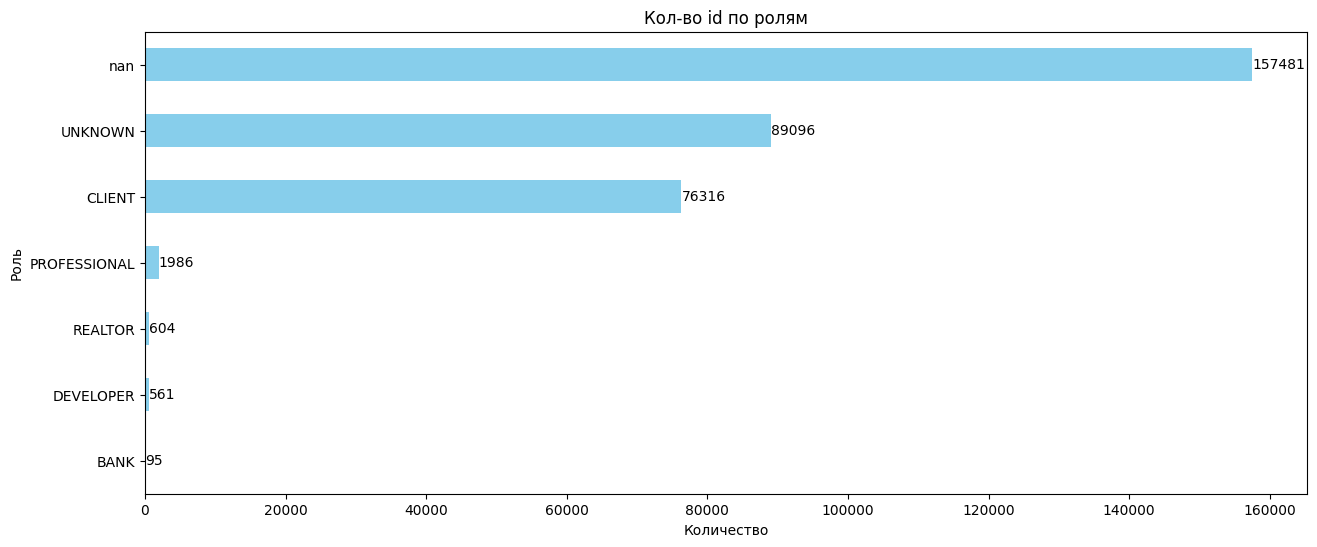

In [477]:
role_counts = df_3['role'].value_counts(dropna=False).sort_values(ascending=True)

# Создаем горизонтальную столбчатую диаграмму
ax = role_counts.plot(kind='barh', figsize=(15, 6), color = 'skyblue')

# Добавляем подписи значений
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height()/2, 
            f'{i.get_width()}', va='center')

# Устанавливаем заголовок и метки осей
plt.title('Кол-во id по ролям')
plt.xlabel('Количество')
plt.ylabel('Роль')

In [478]:
df_3.to_excel('clients_v2.xlsx')

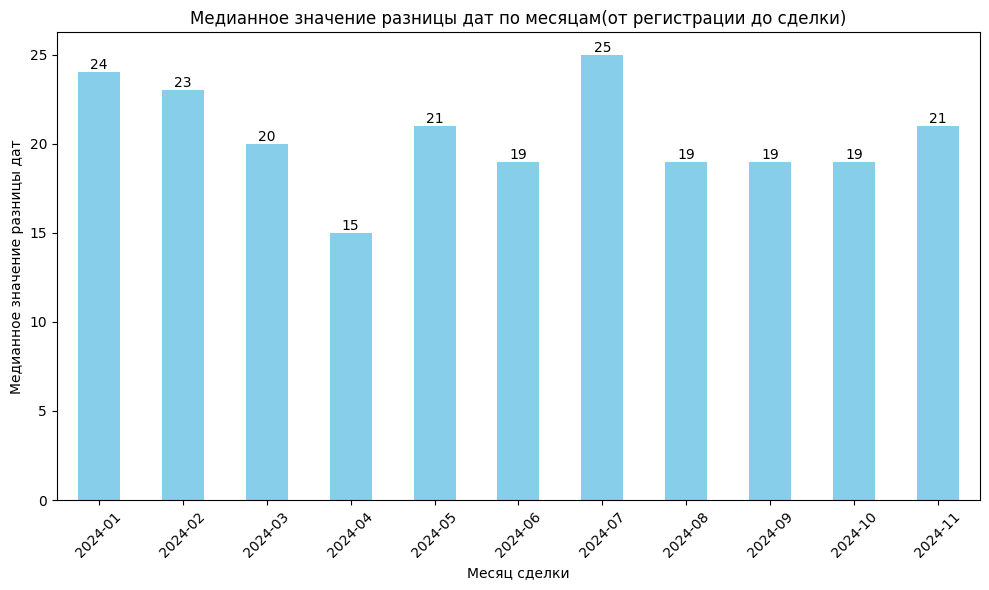

In [479]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_mean = df_3.query('date_difference_days.notna() & date_difference_days>0').groupby(df_3['min_rr_date'].dt.to_period('M'))['date_difference_days'].median()



# Визуализация
plt.figure(figsize=(10, 6))
monthly_mean.plot(kind='bar', color='skyblue')
plt.title('Медианное значение разницы дат по месяцам(от регистрации до сделки)')
plt.xlabel('Месяц сделки')
plt.ylabel('Медианное значение разницы дат')
plt.xticks(rotation=45)


for i, value in enumerate(monthly_mean):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')

plt.tight_layout()

Нерабочие подходы


In [36]:
buy = pd.read_excel('buy_202411210820.xlsx')
buy

c:\Users\flerinvs\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,deal_online__id,phone,fullname__surname,edt,rn
0,b708b465-42e1-4c6e-b733-c31334fbc96c,79877109977,Криницын,2024-11-20,1
1,cf5bd661-4fee-4dd9-95ea-1283215d4e4f,79606263088,Лебедев,2024-11-20,1
2,67cf1c9a-3965-4d4b-8730-f8fe2177b059,79050653737,Макарова,2024-11-20,1
3,563f15ef-5d54-429e-ad36-88b62cbc865e,79083106068,Жиенбаева,2024-11-20,1
4,2c88f92f-aa9b-4e93-8d55-40f4c5a96bdd,79994666605,Арсланбеков,2024-11-20,1
...,...,...,...,...,...
407843,1aa3aa4a-be79-456c-ab44-fae528a85296,79618566261,Кестекеев,2024-11-20,1
407844,1234f15a-8923-43ac-80f0-ff153969339a,79134296395,Баглаев,2024-11-20,1
407845,218862f5-a9c7-4f03-b9b3-189e37908243,79220319302,Чикишев,2024-11-20,1
407846,189d32e3-ba45-4427-b91a-a88bf21ed97d,79210334334,Каражия,2024-11-20,1


In [37]:
sel = pd.read_excel('_with_sel_as_select_from_select_id_data_person_phone_data_person_202411210800.xlsx')
sel

c:\Users\flerinvs\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,id,data_person_phone,data_person_full_name_surname,edt,rn
0,f20e2a79-9df2-40f8-a57c-42db05b88ea7,79162665844,Волошин,2024-11-20,1
1,3a73a366-7dd4-4ee5-966f-d411d9b75ded,79135112811,Бурнусов,2024-11-20,1
2,9017cf1f-2c94-4469-9fa6-b7f79ccc3643,79513908249,Покровская,2024-11-20,1
3,a596ec9b-a1e4-4c8e-be09-cb4f657b3324,79039271289,Носенко,2024-11-20,1
4,20762f6a-1273-4f08-83f6-930332d383be,79037971174,Аскинази,2024-11-20,1
...,...,...,...,...,...
52865,431ac7d3-09fb-4fa4-ad6d-5c7093597701,79145500002,Чернышева,2024-11-20,1
52866,2fa81189-cd64-404b-97ef-fefee91b31b9,79147056144,Шаманаев,2024-11-20,1
52867,d6a3fbc9-36f7-4387-a6b5-25db0c813de0,79110376977,Лемза,2024-11-20,1
52868,6ce930e4-c2c7-414f-89a3-03c70747649b,79398521884,Анджич,2024-11-20,1


In [38]:
deal = pd.read_excel('_DO_REGULAR_REPORT_SSET__202411210805.xlsx')
deal

c:\Users\flerinvs\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,id СО,id КС,Дата создания заявки,Статус заявки,Дата оплаты сделки,Телефон заказчика,Тип заявки СО
0,48c00ba6-4251-4344-9e20-09774dd4097e,00004e2a-c617-4634-b06a-da80e0f75981,2024-07-22,CANCELED,NaT,7.920674e+10,Ипотека
1,1e110c87-74e8-453f-b2c4-9441f249e76e,00005396-cfe5-44e5-bc77-6de35a5676e4,2024-07-03,Черновик,NaT,7.999245e+10,Ипотека
2,6e070485-8f09-4049-8720-ec5e3e093eb3,00005f7a-9ca5-427f-a2d0-2b66c24c7ce7,2024-10-25,Черновик,NaT,7.912442e+10,Ипотека
3,4a9b8fcc-f1d3-477a-bba2-a8e8b264c9f9,0000b03d-1342-42ca-a4f5-77004ac870c8,2024-08-28,CANCELED,NaT,7.982211e+10,Ипотека
4,b0155f04-74d0-4e2c-8504-20416a2baa75,0000c0c3-c3fd-46e8-bf9e-7f9fde22ce5d,2024-04-08,CANCELED,NaT,7.906204e+10,Ипотека
...,...,...,...,...,...,...,...
381678,NaN,61dc9e27-3e48-40eb-8124-db4f24fbff34,2024-09-11,Завершена,2024-09-16,NaN,Неипотека
381679,NaN,f9fcbcd6-d60b-4383-8fcd-5f41fdbc9ce2,2024-04-02,Завершена,2024-04-18,NaN,Неипотека
381680,NaN,eee5bc5f-458a-4f4a-8350-8b362d3263b6,2024-06-28,Завершена,2024-07-02,NaN,Неипотека
381681,NaN,193136f9-ca57-4dfd-9c3b-8542a7ba816b,2024-06-04,Завершена,2024-06-07,NaN,Неипотека


In [48]:
deal_df_temp =deal.merge(sel, how = 'left', left_on = 'id СО', right_on = 'id')\
        [['id СО', 'id КС', 'Дата создания заявки', 'Статус заявки','Дата оплаты сделки', 'Тип заявки СО', 'data_person_phone', 'data_person_full_name_surname']]\
        .rename(columns= {"data_person_phone":"sel_phone", "data_person_full_name_surname":"sel_surname" })
deal_df_temp.head(1)

,id СО,id КС,Дата создания заявки,Статус заявки,Дата оплаты сделки,Тип заявки СО,sel_phone,sel_surname
0,48c00ba6-4251-4344-9e20-09774dd4097e,00004e2a-c617-4634-b06a-da80e0f75981,2024-07-22,CANCELED,NaT,Ипотека,NaN,NaN


In [118]:
deal_df = deal_df_temp.merge(buy, how = 'left', left_on = 'id СО', right_on = 'deal_online__id')\
    [['id СО', 'id КС', 'Дата создания заявки', 'Статус заявки','Дата оплаты сделки', 'Тип заявки СО', 'sel_phone', 'sel_surname', 'phone',	'fullname__surname']]\
    .rename(columns = {"phone":"buy_phone", "fullname__surname": "buy_surname" })\
    .query('`Дата оплаты сделки`.notna()')
deal_df

,id СО,id КС,Дата создания заявки,Статус заявки,Дата оплаты сделки,Тип заявки СО,sel_phone,sel_surname,buy_phone,buy_surname
25,53645811-d09d-4f0a-b356-66327899593c,0004c97b-705c-46d2-b598-45de0ebace3c,2024-11-04,Заявление ЭР завершено РР,2024-11-11,Неипотека,7.982772e+10,Рахманкулова,7.951446e+10,Чуманов
33,71cf6cd7-0239-4245-b4de-e306d07e1f21,00062f28-53e7-4f43-8fc3-499de56e919d,2024-07-04,Сделка завершена,2024-07-08,Неипотека,7.906063e+10,битюцкая,7.916760e+10,мацаль
35,c763fd5b-8d2c-4be2-9a49-f4d672dd56b1,00067dff-1022-40e4-804d-0fccc269fafb,2024-06-21,Сделка завершена,2024-06-27,Неипотека,7.913943e+10,Шпигарь,7.910987e+10,Розин
41,01f35242-e70d-4c22-b101-948e6fc01fd6,0008744e-dbae-485c-9707-d201ca5a321d,2024-04-08,Черновик,2024-04-12,Ипотека,NaN,NaN,7.921552e+10,Савенков
51,4e53a4cf-e574-4f0e-be73-6c0085da62d8,000a7452-0704-45a5-9813-41a6f473fca3,2024-10-04,Сделка завершена,2024-10-16,Ипотека,NaN,NaN,7.952257e+10,Дегтярева
...,...,...,...,...,...,...,...,...,...,...
387051,NaN,61dc9e27-3e48-40eb-8124-db4f24fbff34,2024-09-11,Завершена,2024-09-16,Неипотека,NaN,NaN,NaN,NaN
387052,NaN,f9fcbcd6-d60b-4383-8fcd-5f41fdbc9ce2,2024-04-02,Завершена,2024-04-18,Неипотека,NaN,NaN,NaN,NaN
387053,NaN,eee5bc5f-458a-4f4a-8350-8b362d3263b6,2024-06-28,Завершена,2024-07-02,Неипотека,NaN,NaN,NaN,NaN
387054,NaN,193136f9-ca57-4dfd-9c3b-8542a7ba816b,2024-06-04,Завершена,2024-06-07,Неипотека,NaN,NaN,NaN,NaN


In [81]:
au = pd.read_csv('_REGISTRATIONS__202411210937.csv', sep = ';')
au

,registration_date,user_phone,status,role,rn
0,2021-04-01,70000000001,ACTIVE,CLIENT,1
1,2021-04-01,70000000002,ACTIVE,CLIENT,1
2,2021-04-01,70000000003,ACTIVE,CLIENT,1
3,2022-11-09,73519006953,ACTIVE,PROFESSIONAL,1
4,2020-06-17,73519051367,ACTIVE,CLIENT,1
...,...,...,...,...,...
1092248,2022-12-15,79999999009,ACTIVE,CLIENT,1
1092249,2023-06-01,79999999024,ACTIVE,CLIENT,1
1092250,2023-05-28,79999999034,ACTIVE,CLIENT,1
1092251,2024-06-10,79999999171,ACTIVE,CLIENT,1


подход по разрезу продавец/покупатель

In [191]:
deal_df

,id СО,id КС,Дата создания заявки,Статус заявки,Дата оплаты сделки,Тип заявки СО,sel_phone,sel_surname,buy_phone,buy_surname
25,53645811-d09d-4f0a-b356-66327899593c,0004c97b-705c-46d2-b598-45de0ebace3c,2024-11-04,Заявление ЭР завершено РР,2024-11-11,Неипотека,7.982772e+10,Рахманкулова,7.951446e+10,Чуманов
33,71cf6cd7-0239-4245-b4de-e306d07e1f21,00062f28-53e7-4f43-8fc3-499de56e919d,2024-07-04,Сделка завершена,2024-07-08,Неипотека,7.906063e+10,битюцкая,7.916760e+10,мацаль
35,c763fd5b-8d2c-4be2-9a49-f4d672dd56b1,00067dff-1022-40e4-804d-0fccc269fafb,2024-06-21,Сделка завершена,2024-06-27,Неипотека,7.913943e+10,Шпигарь,7.910987e+10,Розин
41,01f35242-e70d-4c22-b101-948e6fc01fd6,0008744e-dbae-485c-9707-d201ca5a321d,2024-04-08,Черновик,2024-04-12,Ипотека,NaN,NaN,7.921552e+10,Савенков
51,4e53a4cf-e574-4f0e-be73-6c0085da62d8,000a7452-0704-45a5-9813-41a6f473fca3,2024-10-04,Сделка завершена,2024-10-16,Ипотека,NaN,NaN,7.952257e+10,Дегтярева
...,...,...,...,...,...,...,...,...,...,...
387051,NaN,61dc9e27-3e48-40eb-8124-db4f24fbff34,2024-09-11,Завершена,2024-09-16,Неипотека,NaN,NaN,NaN,NaN
387052,NaN,f9fcbcd6-d60b-4383-8fcd-5f41fdbc9ce2,2024-04-02,Завершена,2024-04-18,Неипотека,NaN,NaN,NaN,NaN
387053,NaN,eee5bc5f-458a-4f4a-8350-8b362d3263b6,2024-06-28,Завершена,2024-07-02,Неипотека,NaN,NaN,NaN,NaN
387054,NaN,193136f9-ca57-4dfd-9c3b-8542a7ba816b,2024-06-04,Завершена,2024-06-07,Неипотека,NaN,NaN,NaN,NaN


In [192]:
deal_transform = deal_df.copy(deep=True)

In [193]:
#чистим номера
deal_transform['sel_phone'] = deal_df['sel_phone'].apply(lambda x: str(x).replace('.0', ''))
deal_transform['buy_phone'] = deal_df['buy_phone'].apply(lambda x: str(x).replace('.0', ''))

In [194]:
# может быть несколько участников поэтому дублятся строки
deal_transform.query('sel_phone=="77920118423"')

,id СО,id КС,Дата создания заявки,Статус заявки,Дата оплаты сделки,Тип заявки СО,sel_phone,sel_surname,buy_phone,buy_surname
61038,51854f82-6844-4bd9-a229-fa41019bd9a4,288ea580-4aab-4c53-8026-fa7136a7ff54,2024-02-26,Сделка завершена,2024-03-07,Неипотека,77920118423,Лебедев,79807083180,Алипов
61039,51854f82-6844-4bd9-a229-fa41019bd9a4,288ea580-4aab-4c53-8026-fa7136a7ff54,2024-02-26,Сделка завершена,2024-03-07,Неипотека,77920118423,Лебедев,79807478597,Алипова


In [195]:
deal_transform

,id СО,id КС,Дата создания заявки,Статус заявки,Дата оплаты сделки,Тип заявки СО,sel_phone,sel_surname,buy_phone,buy_surname
25,53645811-d09d-4f0a-b356-66327899593c,0004c97b-705c-46d2-b598-45de0ebace3c,2024-11-04,Заявление ЭР завершено РР,2024-11-11,Неипотека,79827717606,Рахманкулова,79514455556,Чуманов
33,71cf6cd7-0239-4245-b4de-e306d07e1f21,00062f28-53e7-4f43-8fc3-499de56e919d,2024-07-04,Сделка завершена,2024-07-08,Неипотека,79060628814,битюцкая,79167595155,мацаль
35,c763fd5b-8d2c-4be2-9a49-f4d672dd56b1,00067dff-1022-40e4-804d-0fccc269fafb,2024-06-21,Сделка завершена,2024-06-27,Неипотека,79139434615,Шпигарь,79109869220,Розин
41,01f35242-e70d-4c22-b101-948e6fc01fd6,0008744e-dbae-485c-9707-d201ca5a321d,2024-04-08,Черновик,2024-04-12,Ипотека,nan,NaN,79215522292,Савенков
51,4e53a4cf-e574-4f0e-be73-6c0085da62d8,000a7452-0704-45a5-9813-41a6f473fca3,2024-10-04,Сделка завершена,2024-10-16,Ипотека,nan,NaN,79522569641,Дегтярева
...,...,...,...,...,...,...,...,...,...,...
387051,NaN,61dc9e27-3e48-40eb-8124-db4f24fbff34,2024-09-11,Завершена,2024-09-16,Неипотека,nan,NaN,nan,NaN
387052,NaN,f9fcbcd6-d60b-4383-8fcd-5f41fdbc9ce2,2024-04-02,Завершена,2024-04-18,Неипотека,nan,NaN,nan,NaN
387053,NaN,eee5bc5f-458a-4f4a-8350-8b362d3263b6,2024-06-28,Завершена,2024-07-02,Неипотека,nan,NaN,nan,NaN
387054,NaN,193136f9-ca57-4dfd-9c3b-8542a7ba816b,2024-06-04,Завершена,2024-06-07,Неипотека,nan,NaN,nan,NaN


In [196]:
sel = deal_transform.query('sel_phone != "nan"')\
    [['sel_phone', 'sel_surname', 'Дата оплаты сделки','Тип заявки СО']]\
    .pivot_table(index=['sel_phone', 'sel_surname', 'Дата оплаты сделки'],columns='Тип заявки СО', aggfunc='size', fill_value=0).reset_index()\
    .rename(columns = {"sel_phone":"phone", "sel_surname":"surname"})
sel.insert(0, 'Роль', 'Продавец')
sel

Тип заявки СО,Роль,phone,surname,Дата оплаты сделки,Ипотека,Неипотека
0,Продавец,70000000000,Гарифуллин,2024-03-21,0,1
1,Продавец,70000000000,Глют,2024-08-05,0,1
2,Продавец,70000000000,Димиева,2024-07-25,0,1
3,Продавец,70000000000,Дмитриенко,2024-09-09,0,1
4,Продавец,70000000000,Компаниец,2024-01-17,0,1
...,...,...,...,...,...,...
14428,Продавец,79999999999,Поликарпова,2024-07-19,0,1
14429,Продавец,79999999999,Телегина,2024-02-19,0,1
14430,Продавец,79999999999,Тупицын,2024-07-17,0,1
14431,Продавец,79999999999,Халиков,2024-06-25,0,1


In [197]:
buy = deal_transform.query('buy_phone != "nan"')\
    [['buy_phone', 'buy_surname', 'Дата оплаты сделки','Тип заявки СО']]\
    .pivot_table(index=['buy_phone', 'buy_surname', 'Дата оплаты сделки'],columns='Тип заявки СО', aggfunc='size', fill_value=0).reset_index()\
    .rename(columns = {"buy_phone":"phone", "buy_surname":"surname"})
buy.insert(0, 'Роль', 'Покупатель')
buy

Тип заявки СО,Роль,phone,surname,Дата оплаты сделки,Ипотека,Неипотека
0,Покупатель,70000000000,Байдавлетов,2024-09-11,0,1
1,Покупатель,70000000000,Дементьев,2024-02-26,0,1
2,Покупатель,70000000000,Иконописцева,2024-02-02,0,1
3,Покупатель,70000000000,Казберова,2024-03-20,0,1
4,Покупатель,70000000000,Копылова,2024-03-21,0,1
...,...,...,...,...,...,...
68272,Покупатель,79999999999,Кошелева,2024-04-18,0,1
68273,Покупатель,79999999999,Логинова,2024-06-06,0,1
68274,Покупатель,79999999999,Салмоян,2024-06-10,0,1
68275,Покупатель,79999999999,Фуряева,2024-05-06,0,3


In [198]:
deal_temp =pd.concat([buy, sel], ignore_index=True)
deal_temp


Тип заявки СО,Роль,phone,surname,Дата оплаты сделки,Ипотека,Неипотека
0,Покупатель,70000000000,Байдавлетов,2024-09-11,0,1
1,Покупатель,70000000000,Дементьев,2024-02-26,0,1
2,Покупатель,70000000000,Иконописцева,2024-02-02,0,1
3,Покупатель,70000000000,Казберова,2024-03-20,0,1
4,Покупатель,70000000000,Копылова,2024-03-21,0,1
...,...,...,...,...,...,...
82705,Продавец,79999999999,Поликарпова,2024-07-19,0,1
82706,Продавец,79999999999,Телегина,2024-02-19,0,1
82707,Продавец,79999999999,Тупицын,2024-07-17,0,1
82708,Продавец,79999999999,Халиков,2024-06-25,0,1


In [204]:
dl = deal_temp.merge(au[['registration_date', 'user_phone', 'status']], how = 'left', left_on = 'phone', right_on = 'user_phone')
dl

,Роль,phone,surname,Дата оплаты сделки,Ипотека,Неипотека,registration_date,user_phone,status
0,Покупатель,70000000000,Байдавлетов,2024-09-11,0,1,NaN,NaN,NaN
1,Покупатель,70000000000,Дементьев,2024-02-26,0,1,NaN,NaN,NaN
2,Покупатель,70000000000,Иконописцева,2024-02-02,0,1,NaN,NaN,NaN
3,Покупатель,70000000000,Казберова,2024-03-20,0,1,NaN,NaN,NaN
4,Покупатель,70000000000,Копылова,2024-03-21,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
82705,Продавец,79999999999,Поликарпова,2024-07-19,0,1,NaN,NaN,NaN
82706,Продавец,79999999999,Телегина,2024-02-19,0,1,NaN,NaN,NaN
82707,Продавец,79999999999,Тупицын,2024-07-17,0,1,NaN,NaN,NaN
82708,Продавец,79999999999,Халиков,2024-06-25,0,1,NaN,NaN,NaN


подход не сработал

In [154]:
#оказывается не все участники сделки регаются в лк. Маппить по ЛК не получится
au_temp =au.merge(deal_df[['sel_phone', 'sel_surname', 'id КС', 'Дата оплаты сделки', 'Тип заявки СО']], how = 'left', left_on = 'user_phone', right_on = 'sel_phone')
au_temp

,registration_date,user_phone,status,role,rn,sel_phone,sel_surname,id КС,Дата оплаты сделки,Тип заявки СО
0,2021-04-01,70000000001,ACTIVE,CLIENT,1,NaN,NaN,NaN,NaT,NaN
1,2021-04-01,70000000002,ACTIVE,CLIENT,1,7.000000e+10,Кузовинский,baf57109-c77d-43ef-8b55-74a599a5f25d,2024-07-29,Неипотека
2,2021-04-01,70000000003,ACTIVE,CLIENT,1,NaN,NaN,NaN,NaT,NaN
3,2022-11-09,73519006953,ACTIVE,PROFESSIONAL,1,NaN,NaN,NaN,NaT,NaN
4,2020-06-17,73519051367,ACTIVE,CLIENT,1,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
1092857,2022-12-15,79999999009,ACTIVE,CLIENT,1,NaN,NaN,NaN,NaT,NaN
1092858,2023-06-01,79999999024,ACTIVE,CLIENT,1,NaN,NaN,NaN,NaT,NaN
1092859,2023-05-28,79999999034,ACTIVE,CLIENT,1,NaN,NaN,NaN,NaT,NaN
1092860,2024-06-10,79999999171,ACTIVE,CLIENT,1,NaN,NaN,NaN,NaT,NaN


In [83]:
#проверка на количество телефонов продавцов 
t = deal_df[['sel_phone']].query('sel_phone.notna()').drop_duplicates()
t

,sel_phone
25,7.982772e+10
33,7.906063e+10
35,7.913943e+10
103,7.903137e+10
137,7.915152e+10
...,...
385582,7.999687e+10
385644,7.926906e+10
385663,7.923495e+10
385693,7.924874e+10


In [84]:
t = t.merge(au_temp, how = 'left', left_on = 'sel_phone', right_on = 'sel_phone').query('user_phone.isna()')
t

,sel_phone,registration_date,user_phone,status,role,rn,sel_surname,id КС,Дата оплаты сделки,Тип заявки СО
0,7.982772e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,7.906063e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,7.913943e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,7.903137e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,7.915152e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
14725,7.925859e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
14727,7.926906e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
14728,7.923495e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
14729,7.924874e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [79]:
#79060628814 -нет в лк
#https://m2.ru/alternative/deals/00062f28-53e7-4f43-8fc3-499de56e919d
t['sel_phone'].astype(str) 

0        79827717606.0
1        79060628814.0
2        79139434615.0
3        79031368770.0
4        79151517684.0
             ...      
14725    79258585882.0
14727    79269061182.0
14728    79234947328.0
14729    79248737037.0
14730    79269003706.0
Name: sel_phone, Length: 10881, dtype: object